<a href="https://colab.research.google.com/github/Essamdz/How_to_make_a_text_summarizer/blob/master/Play_with_latent_directions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%tensorflow_version 1.x
from google.colab import drive

TensorFlow 1.x selected.


In [2]:
!pip install --force tqdm==4.24.0

     |████████████████████████████████| 51kB 7.2MB/s 
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.24.0 which is incompatible.
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0


In [0]:
import tensorflow
tensorflow.__version__

'1.15.2'

In [1]:
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 93, done.
remote: Total 93 (delta 0), reused 0 (delta 0), pack-reused 93
Unpacking objects: 100% (93/93), done.


In [3]:
!git clone https://github.com/NVlabs/stylegan.git

Cloning into 'stylegan'...
remote: Enumerating objects: 83, done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 83
Unpacking objects: 100% (83/83), done.


In [0]:
! ls /content/drive/My\ Drive/xxx/

karras2019stylegan-ffhq-1024x1024.pkl


In [0]:

!cp -r /content/drive/My\ Drive/stylegan-encoder/ /content/


In [0]:
!cp -r /content/drive/My\ Drive/xxx/*.* /content/stylegan-encoder/


In [5]:
tflib.init_tf()

url = "https://drive.google.com/open?id=1euiaSOG10s1FZJe8FsMEuuX7iPHU4D3G"# 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'# karras2019stylegan-ffhq-1024x1024.pkl
f=dnnlib.util.open_url(url, cache_dir=config.cache_dir)
G, D, Gs = pickle.load(f)
generator = Generator(Gs, batch_size=1, randomize_noise=False)

UnpicklingError: ignored

In [0]:
 
import io
#import pretrained_networks
tflib.init_tf()
f=open("stylegan-encoder/karras2019stylegan-ffhq-1024x1024.pkl",'rb')
print(type(f))
#f = dnnlib.util.open_url("stylegan/karras2019stylegan-ffhq-1024x1024.pkl", cache_dir=config.cache_dir)  
#f=open("karras2019stylegan-ffhq-1024x1024.pkl", "wb") 
#f.write(f)
#f=io.BytesIO(f)
#G, D,  Gs = pretrained_networks.load_networks('gdrive:networks/stylegan-ffhq-1024x1024.pkl')

generator_network, discriminator_network, Gs = pickle.load(f)
generator = Generator( Gs, batch_size=1, randomize_noise=False)


In [0]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [0]:
# Loading already learned representations
#donald_trump = np.load('ffhq_dataset/latent_representations/donald_trump_01.npy')
#hillary_clinton = np.load('ffhq_dataset/latent_representations/hillary_clinton_01.npy')
hillary_clinton = np.load('/content/stylegan-encoder/ffhq_dataset/latent_representations/hillary_clinton_01.npy')
donald_trump= np.load('/content/stylegan-encoder/ffhq_dataset/latent_representations/donald_trump_01.npy')
# Of course you can learn your own vectors using two scripts

# 1) Extract and align faces from images
# python align_images.py raw_images/ aligned_images/

# 2) Find latent representation of aligned images
# python encode_images.py aligned_images/ generated_images/ latent_representations/

In [0]:
# Loading already learned latent directions
smile_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/age.npy')

# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

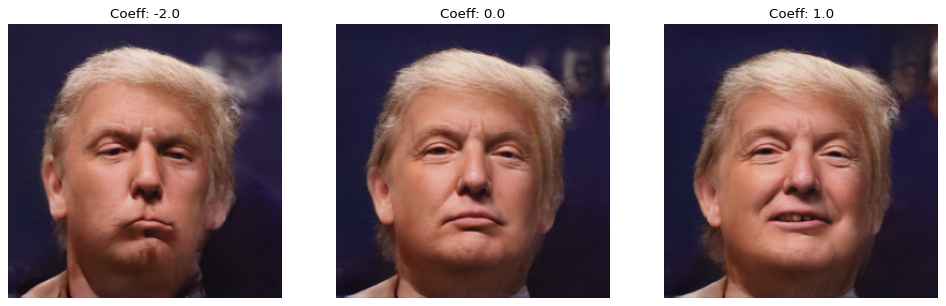

In [19]:
move_and_show(donald_trump, smile_direction, [-2, 0, 1])


In [8]:

!python stylegan-encoder/align_images.py stylegan-encoder/image1/ stylegan-encoder/imageOut/

Using TensorFlow backend.


In [2]:
!python stylegan-encoder/encode_images.py stylegan-encoder/imageOut/ stylegan-encoder/imageLatent/ stylegan-encoder/dlatent_dir/ \
    --vgg_url=https://rolux.org/media/stylegan/vgg16_zhang_perceptual.pkl \
    --batch_size=2




Using TensorFlow backend.







Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... WARNING:tensorflow:From /content/stylegan-encoder/dnnlib/tflib/custom_ops.py:136: The name tf.VERSION is deprecated. Please use tf.version.VERSION instead.

Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
  0% 0/1 [00:00<?, ?it/s]WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:431: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.


Loading mask masks/essam_01.png
Loading mask masks/m1_01.png
Loading mask masks/essam_01.png
Loading mask masks/m1_01.png

  0% 0/100 [00:00<?, ?it/s]WARNING:tensorflow:
The TensorFlow contrib module will not be included in 

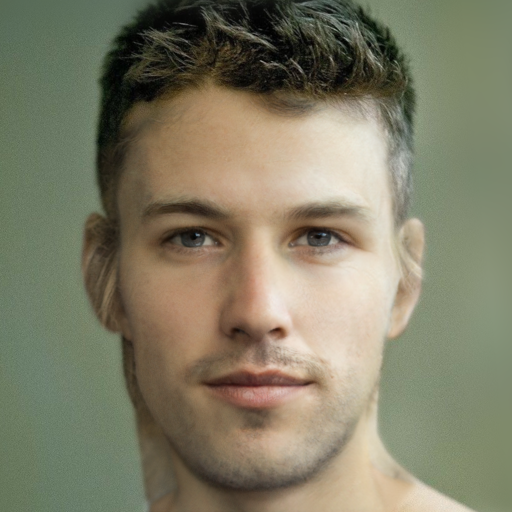

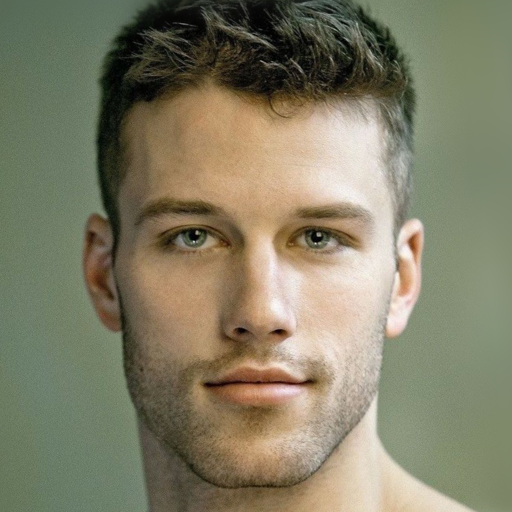

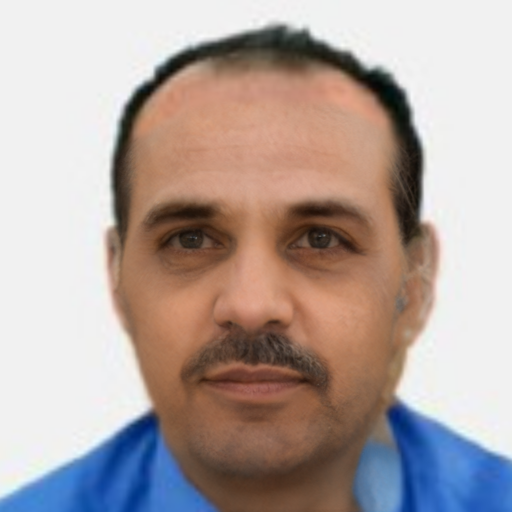

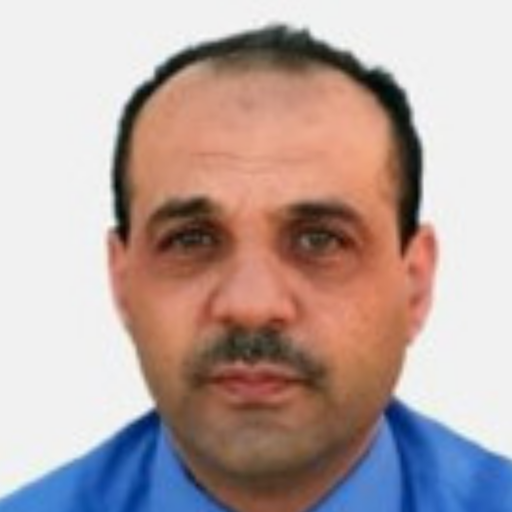

In [4]:
import PIL.Image

display(PIL.Image.open('stylegan-encoder/imageLatent/m1_01.png').resize((512, 512)))
display(PIL.Image.open('stylegan-encoder/imageOut/m1_01.png').resize((512, 512)))

display(PIL.Image.open('stylegan-encoder/imageLatent/essam_01.png').resize((512, 512)))
display(PIL.Image.open('stylegan-encoder/imageOut/essam_01.png').resize((512, 512)))


In [2]:
!python stylegan-encoder/encode_images.py stylegan-encoder/imageOut/ stylegan-encoder/imageLatent/ stylegan-encoder/dlatent_dir/ \
    --vgg_url=https://rolux.org/media/stylegan/vgg16_zhang_perceptual.pkl \
    --lr=0.25 --iterations=1000 --use_l1_penalty=0.5




Using TensorFlow backend.







Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... WARNING:tensorflow:From /content/stylegan-encoder/dnnlib/tflib/custom_ops.py:136: The name tf.VERSION is deprecated. Please use tf.version.VERSION instead.

Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
  0% 0/2 [00:00<?, ?it/s]WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:431: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.


Loading mask masks/essam_01.png
Loading mask masks/essam_01.png

  0% 0/1000 [00:00<?, ?it/s]WARNING:tensorflow:
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * htt

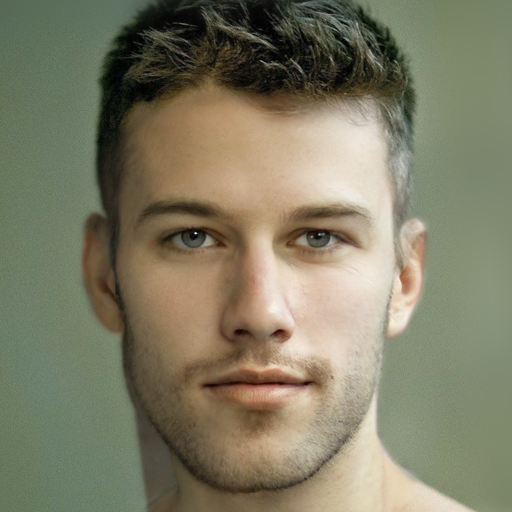

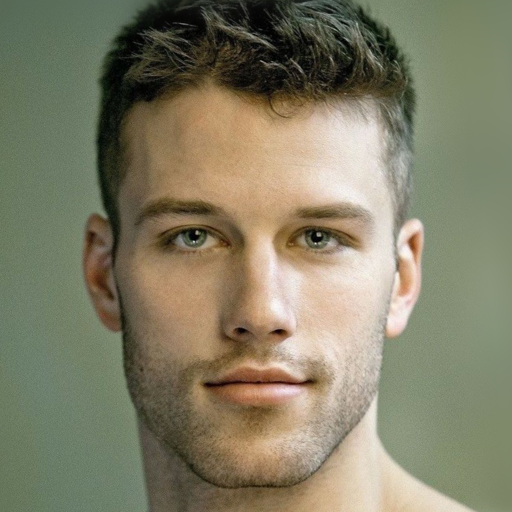

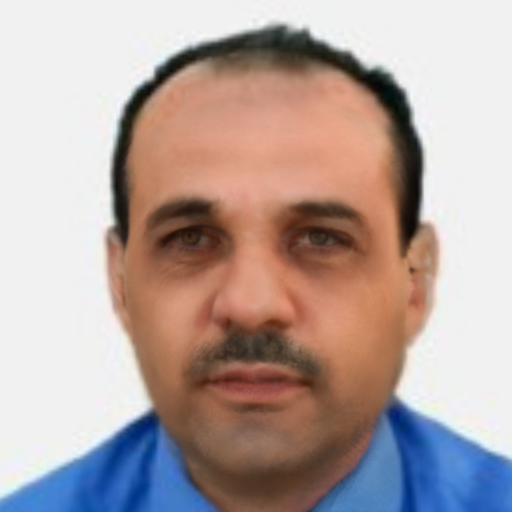

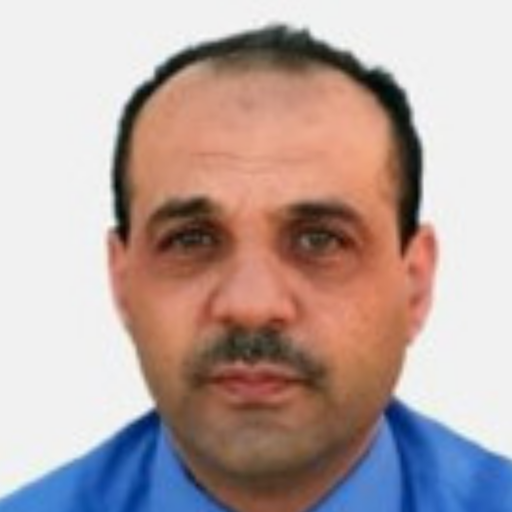

In [4]:
import PIL.Image

display(PIL.Image.open('stylegan-encoder/imageLatent/m1_01.png').resize((512, 512)))
display(PIL.Image.open('stylegan-encoder/imageOut/m1_01.png').resize((512, 512)))

display(PIL.Image.open('stylegan-encoder/imageLatent/essam_01.png').resize((512, 512)))
display(PIL.Image.open('stylegan-encoder/imageOut/essam_01.png').resize((512, 512)))

In [2]:
import sys
#sys.path.insert(0, "/content/stylegan")
sys.path.insert(0, "/content/stylegan-encoder")
#sys.path.insert(0, "/content/stylegan2")
import dnnlib
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

import io

tflib.init_tf()

f=open("stylegan-encoder/karras2019stylegan-ffhq-1024x1024.pkl",'rb')

generator_network, discriminator_network, Gs  = pickle.load(f)
print(type(f))

generator = Generator( Gs, batch_size=1, randomize_noise=False)












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
<class '_io.BufferedReader'>



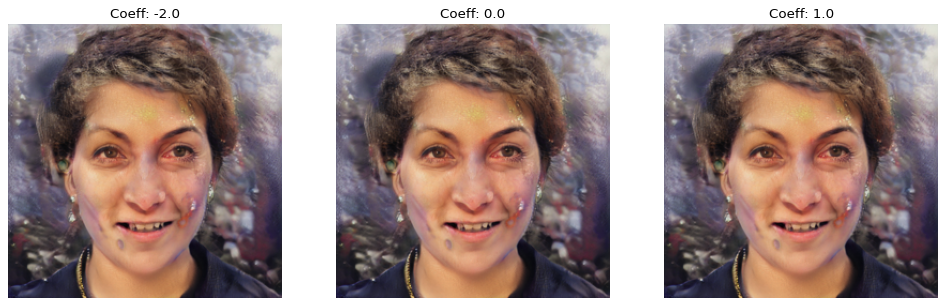

In [8]:

def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector+ coeff*direction )[:8] #
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()


hillary_clinton = np.load('/content/stylegan-encoder/ffhq_dataset/latent_representations/hillary_clinton_01.npy')
donald_trump= np.load('/content/stylegan-encoder/ffhq_dataset/latent_representations/donald_trump_01.npy')
donald_trump= np.load('/content/stylegan-encoder/dlatent_dir/essam_01.npy')

# Loading already learned latent directions
smile_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/age.npy')

move_and_show(donald_trump, smile_direction, [-2, 0, 1])

In [3]:
import sys

#sys.path.insert(0, "/content/stylegan")
sys.path.insert(0, "/content/stylegan-encoder")
#sys.path.insert(0, "/content/stylegan2")

import numpy as np
import config
import dnnlib
import dnnlib.tflib as tflib
import pickle
import PIL.Image
# load the StyleGAN model into Colab


"""
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)
"""
tflib.init_tf()
f=open("stylegan-encoder/karras2019stylegan-ffhq-1024x1024.pkl",'rb')

generator_network, discriminator_network,  Gs_network   = pickle.load(f)
print(type(f))











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
<class '_io.BufferedReader'>


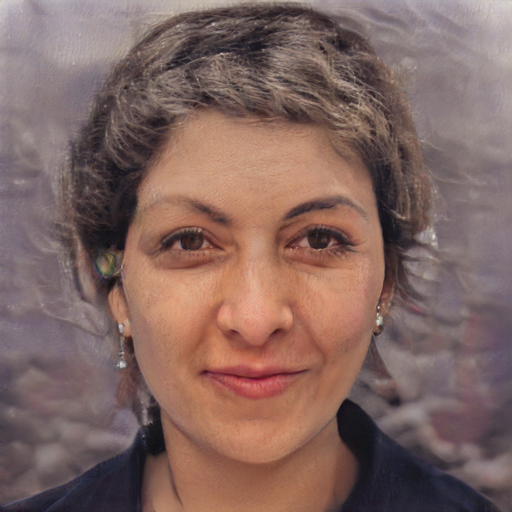

In [4]:
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

generator = Generator( Gs_network, batch_size=1, randomize_noise=False)
# load the latents
#('/content/stylegan-encoder/ffhq_dataset/latent_representations/hillary_clinton_01.npy')
s1 = np.load('/content/stylegan-encoder/dlatent_dir/essam_01.npy')
s2 = np.load('/content/stylegan-encoder/dlatent_dir/m1_01.npy')
s1 = np.expand_dims(s1,axis=0)
s2 = np.expand_dims(s2,axis=0)
# combine the latents somehow... let's try an average:
savg =s1# 0.9*s1+.1*s2
# run the generator network to render the latents:
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
images = Gs_network.components.synthesis.run(savg, randomize_noise=False, **synthesis_kwargs)
display(PIL.Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').resize((512,512),PIL.Image.LANCZOS))

In [9]:
 ##################################################################################
 ##################################################################################
 
import io
#import pretrained_networks
tflib.init_tf()
f=open("stylegan-encoder/karras2019stylegan-ffhq-1024x1024.pkl",'rb')
print(type(f))
#f = dnnlib.util.open_url("stylegan/karras2019stylegan-ffhq-1024x1024.pkl", cache_dir=config.cache_dir)  
#f=open("karras2019stylegan-ffhq-1024x1024.pkl", "wb") 
#f.write(f)
#f=io.BytesIO(f)
#G, D,  Gs = pretrained_networks.load_networks('gdrive:networks/stylegan-ffhq-1024x1024.pkl')

generator_network, discriminator_network, Gs = pickle.load(f)
#generator = Generator( Gs, batch_size=1, randomize_noise=False)

<class '_io.BufferedReader'>


In [0]:

# Pick latent vector.
rnd = np.random.RandomState(100)
latents = rnd.randn(1, Gs.input_shape[1])
######################################################
latents = np.load('/content/stylegan-encoder/ffhq_dataset/latent_representations/hillary_clinton_01.npy')
latents = np.load('/content/stylegan-encoder/ffhq_dataset/latent_representations/donald_trump_01.npy')

smile_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/smile.npy')
new_latent_vector = latents.copy()
new_latent_vector[:8] = (latents + 5*smile_direction)[:8]
#move_and_show(donald_trump, smile_direction, [-1, 0, 2])
#latent_vector = new_latent_vector.reshape((1, 18, 512))
#Gs.set_dlatents(latent_vector)
#Gs.reset_vars()
##################################################################################
# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents,None,  truncation_psi=-0.5, randomize_noise=False, output_transform=fmt)
#new_latent_vector

In [0]:
# Save image.
os.makedirs(config.result_dir, exist_ok=True)
png_filename = os.path.join(config.result_dir, 'example10.png')

PIL.Image.fromarray(images[0], 'RGB').save(png_filename)
print(png_filename)

results/example10.png


In [0]:
"""
url = os.path.abspath("stylegan-encoder/karras2019stylegan-ffhq-1024x1024.pkl")
with open(url, 'rb') as f:
    _G, _D, Gs = pickle.load(f)
"""

In [0]:
"""
tflib.init_tf()

url = "https://drive.google.com/open?id=1euiaSOG10s1FZJe8FsMEuuX7iPHU4D3G"#'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
     G, D, Gs = pickle.load(f)
generator = Generator(Gs, batch_size=1, randomize_noise=False)

"""


In [0]:

"""
%tensorflow_version 2.x
from google.colab import drive
sys.path.insert(0, "/content/stylegan")

URL = "https://drive.google.com/open?id=1euiaSOG10s1FZJe8FsMEuuX7iPHU4D3G"

tflib.init_tf()
f=dnnlib.util.open_url(URL, cache_dir=config.cache_dir)
print(f)
generator_network, discriminator_network, Gs= pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)
# Print network details.
#Gs.print_layers()

# Pick latent vector.
rnd = np.random.RandomState(5)
latents = rnd.randn(1, Gs.input_shape[1])

# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
"""

<_io.BufferedReader name='cache/d71aba80de6a75d16f3d0a435c85e125_https___drive.google.com_open_id_1euiaSOG10s1FZJe8FsMEuuX7iPHU4D3G'>


UnpicklingError: ignored

In [0]:
)def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [0]:
# Loading already learned representations
sys.path.insert(0, "/content/stylegan-encoder")

donald_trump = np.load('/content/stylegan-encoder/ffhq_dataset/latent_representations/donald_trump_01.npy')
hillary_clinton = np.load('/content/stylegan-encoder/ffhq_dataset/latent_representations/hillary_clinton_01.npy')

# Of course you can learn your own vectors using two scripts

# 1) Extract and align faces from images
# python align_images.py raw_images/ aligned_images/

# 2) Find latent representation of aligned images
# python encode_images.py aligned_images/ generated_images/ latent_representations/

In [0]:
# Loading already learned latent directions
smile_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('/content/stylegan-encoder/ffhq_dataset/latent_directions/age.npy')

# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

# Smile transformation

In [0]:
move_and_show(donald_trump, smile_direction, [-1, 0, 2])

In [0]:
move_and_show(hillary_clinton, smile_direction, [-1, 0, 1])

# Gender transformation

In [0]:
move_and_show(donald_trump, gender_direction, [-2, 0, 2])

In [0]:
move_and_show(hillary_clinton, gender_direction, [-1.5, 0, 1.])

# Age transformation

In [0]:
move_and_show(hillary_clinton, age_direction, [-2, 0, 2])

In [0]:
# try it yourself!
move_and_show(donald_trump, age_direction, [-3, 0, 1])

In [0]:

import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

def main():
    # Initialize TensorFlow.
    tflib.init_tf()
    sys.path.insert(0, "/content/stylegan")

    URL = "https://drive.google.com/open?id=1euiaSOG10s1FZJe8FsMEuuX7iPHU4D3G"

    tflib.init_tf()
    f=open("stylegan-encoder/karras2019stylegan-ffhq-1024x1024.pkl",'rb')
    print(f)
    _G, _D, Gs = pickle.load(f)

    # Load pre-trained network.
    """
    url ="https://drive.google.com/open?id=1euiaSOG10s1FZJe8FsMEuuX7iPHU4D3G"# 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
    with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
        _G, _D, Gs = pickle.load(f)
        # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
        # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
        # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.
    """
    # Print network details.
    Gs.print_layers()

    # Pick latent vector.
    rnd = np.random.RandomState(5)
    latents = rnd.randn(1, Gs.input_shape[1])

    # Generate image.
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

    # Save image.
    os.makedirs(config.result_dir, exist_ok=True)
    png_filename = os.path.join(config.result_dir, 'example.png')

    PIL.Image.fromarray(images[0], 'RGB').save(png_filename)
    print(png_filename)
if __name__ == "__main__":
    main()

<_io.BufferedReader name='stylegan-encoder/karras2019stylegan-ffhq-1024x1024.pkl'>

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                2626

In [0]:

import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

#----------------------------------------------------------------------------
# Helpers for loading and using pre-trained generators.

url_ffhq        = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
url_celebahq    = 'https://drive.google.com/uc?id=1MGqJl28pN4t7SAtSrPdSRJSQJqahkzUf' # karras2019stylegan-celebahq-1024x1024.pkl
url_bedrooms    = 'https://drive.google.com/uc?id=1MOSKeGF0FJcivpBI7s63V9YHloUTORiF' # karras2019stylegan-bedrooms-256x256.pkl
url_cars        = 'https://drive.google.com/uc?id=1MJ6iCfNtMIRicihwRorsM3b7mmtmK9c3' # karras2019stylegan-cars-512x384.pkl
url_cats        = 'https://drive.google.com/uc?id=1MQywl0FNt6lHu8E_EUqnRbviagS7fbiJ' # karras2019stylegan-cats-256x256.pkl

synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=8)

_Gs_cache = dict()

def load_Gs(url):
    if url not in _Gs_cache:
        with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
            _G, _D, Gs = pickle.load(f)
        _Gs_cache[url] = Gs
    return _Gs_cache[url]

#----------------------------------------------------------------------------
# Figures 2, 3, 10, 11, 12: Multi-resolution grid of uncurated result images.

def draw_uncurated_result_figure(png, Gs, cx, cy, cw, ch, rows, lods, seed):
    print(png)
    latents = np.random.RandomState(seed).randn(sum(rows * 2**lod for lod in lods), Gs.input_shape[1])
    images = Gs.run(latents, None, **synthesis_kwargs) # [seed, y, x, rgb]

    canvas = PIL.Image.new('RGB', (sum(cw // 2**lod for lod in lods), ch * rows), 'white')
    image_iter = iter(list(images))
    for col, lod in enumerate(lods):
        for row in range(rows * 2**lod):
            image = PIL.Image.fromarray(next(image_iter), 'RGB')
            image = image.crop((cx, cy, cx + cw, cy + ch))
            image = image.resize((cw // 2**lod, ch // 2**lod), PIL.Image.ANTIALIAS)
            canvas.paste(image, (sum(cw // 2**lod for lod in lods[:col]), row * ch // 2**lod))
    canvas.save(png)

#----------------------------------------------------------------------------
# Figure 3: Style mixing.

def draw_style_mixing_figure(png, Gs, w, h, src_seeds, dst_seeds, style_ranges):
    print(png)
    src_latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in src_seeds)
    dst_latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in dst_seeds)
    src_dlatents = Gs.components.mapping.run(src_latents, None) # [seed, layer, component]
    dst_dlatents = Gs.components.mapping.run(dst_latents, None) # [seed, layer, component]
    src_images = Gs.components.synthesis.run(src_dlatents, randomize_noise=False, **synthesis_kwargs)
    dst_images = Gs.components.synthesis.run(dst_dlatents, randomize_noise=False, **synthesis_kwargs)

    canvas = PIL.Image.new('RGB', (w * (len(src_seeds) + 1), h * (len(dst_seeds) + 1)), 'white')
    for col, src_image in enumerate(list(src_images)):
        canvas.paste(PIL.Image.fromarray(src_image, 'RGB'), ((col + 1) * w, 0))
    for row, dst_image in enumerate(list(dst_images)):
        canvas.paste(PIL.Image.fromarray(dst_image, 'RGB'), (0, (row + 1) * h))
        row_dlatents = np.stack([dst_dlatents[row]] * len(src_seeds))
        row_dlatents[:, style_ranges[row]] = src_dlatents[:, style_ranges[row]]
        row_images = Gs.components.synthesis.run(row_dlatents, randomize_noise=False, **synthesis_kwargs)
        for col, image in enumerate(list(row_images)):
            canvas.paste(PIL.Image.fromarray(image, 'RGB'), ((col + 1) * w, (row + 1) * h))
    canvas.save(png)

#----------------------------------------------------------------------------
# Figure 4: Noise detail.

def draw_noise_detail_figure(png, Gs, w, h, num_samples, seeds):
    print(png)
    canvas = PIL.Image.new('RGB', (w * 3, h * len(seeds)), 'white')
    for row, seed in enumerate(seeds):
        latents = np.stack([np.random.RandomState(seed).randn(Gs.input_shape[1])] * num_samples)
        images = Gs.run(latents, None, truncation_psi=1, **synthesis_kwargs)
        canvas.paste(PIL.Image.fromarray(images[0], 'RGB'), (0, row * h))
        for i in range(4):
            crop = PIL.Image.fromarray(images[i + 1], 'RGB')
            crop = crop.crop((650, 180, 906, 436))
            crop = crop.resize((w//2, h//2), PIL.Image.NEAREST)
            canvas.paste(crop, (w + (i%2) * w//2, row * h + (i//2) * h//2))
        diff = np.std(np.mean(images, axis=3), axis=0) * 4
        diff = np.clip(diff + 0.5, 0, 255).astype(np.uint8)
        canvas.paste(PIL.Image.fromarray(diff, 'L'), (w * 2, row * h))
    canvas.save(png)

#----------------------------------------------------------------------------
# Figure 5: Noise components.

def draw_noise_components_figure(png, Gs, w, h, seeds, noise_ranges, flips):
    print(png)
    Gsc = Gs.clone()
    noise_vars = [var for name, var in Gsc.components.synthesis.vars.items() if name.startswith('noise')]
    noise_pairs = list(zip(noise_vars, tflib.run(noise_vars))) # [(var, val), ...]
    latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in seeds)
    all_images = []
    for noise_range in noise_ranges:
        tflib.set_vars({var: val * (1 if i in noise_range else 0) for i, (var, val) in enumerate(noise_pairs)})
        range_images = Gsc.run(latents, None, truncation_psi=1, randomize_noise=False, **synthesis_kwargs)
        range_images[flips, :, :] = range_images[flips, :, ::-1]
        all_images.append(list(range_images))

    canvas = PIL.Image.new('RGB', (w * 2, h * 2), 'white')
    for col, col_images in enumerate(zip(*all_images)):
        canvas.paste(PIL.Image.fromarray(col_images[0], 'RGB').crop((0, 0, w//2, h)), (col * w, 0))
        canvas.paste(PIL.Image.fromarray(col_images[1], 'RGB').crop((w//2, 0, w, h)), (col * w + w//2, 0))
        canvas.paste(PIL.Image.fromarray(col_images[2], 'RGB').crop((0, 0, w//2, h)), (col * w, h))
        canvas.paste(PIL.Image.fromarray(col_images[3], 'RGB').crop((w//2, 0, w, h)), (col * w + w//2, h))
    canvas.save(png)

#----------------------------------------------------------------------------
# Figure 8: Truncation trick.

def draw_truncation_trick_figure(png, Gs, w, h, seeds, psis):
    print(png)
    latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in seeds)
    dlatents = Gs.components.mapping.run(latents, None) # [seed, layer, component]
    dlatent_avg = Gs.get_var('dlatent_avg') # [component]

    canvas = PIL.Image.new('RGB', (w * len(psis), h * len(seeds)), 'white')
    for row, dlatent in enumerate(list(dlatents)):
        row_dlatents = (dlatent[np.newaxis] - dlatent_avg) * np.reshape(psis, [-1, 1, 1]) + dlatent_avg
        row_images = Gs.components.synthesis.run(row_dlatents, randomize_noise=False, **synthesis_kwargs)
        for col, image in enumerate(list(row_images)):
            canvas.paste(PIL.Image.fromarray(image, 'RGB'), (col * w, row * h))
    canvas.save(png)

#----------------------------------------------------------------------------
# Main program.

def main():
    tflib.init_tf()
    os.makedirs(config.result_dir, exist_ok=True)
    draw_uncurated_result_figure(os.path.join(config.result_dir, 'figure02-uncurated-ffhq.png'), load_Gs(url_ffhq), cx=0, cy=0, cw=1024, ch=1024, rows=3, lods=[0,1,2,2,3,3], seed=5)
    draw_style_mixing_figure(os.path.join(config.result_dir, 'figure03-style-mixing.png'), load_Gs(url_ffhq), w=1024, h=1024, src_seeds=[639,701,687,615,2268], dst_seeds=[889,850,1880,1730,1610,840], style_ranges=[range(0,4)]*3+[range(4,8)]*2+[range(8,18)])#[888,829,1898,1733,1614,845]
    draw_noise_detail_figure(os.path.join(config.result_dir, 'figure04-noise-detail.png'), load_Gs(url_ffhq), w=1024, h=1024, num_samples=100, seeds=[1157,1012])
    draw_noise_components_figure(os.path.join(config.result_dir, 'figure05-noise-components.png'), load_Gs(url_ffhq), w=1024, h=1024, seeds=[1967,1555], noise_ranges=[range(0, 18), range(0, 0), range(8, 18), range(0, 8)], flips=[1])
    draw_truncation_trick_figure(os.path.join(config.result_dir, 'figure08-truncation-trick.png'), load_Gs(url_ffhq), w=1024, h=1024, seeds=[91,388], psis=[1, 0.7, 0.5, 0, -0.5, -1])
    draw_uncurated_result_figure(os.path.join(config.result_dir, 'figure10-uncurated-bedrooms.png'), load_Gs(url_bedrooms), cx=0, cy=0, cw=256, ch=256, rows=5, lods=[0,0,1,1,2,2,2], seed=0)
    draw_uncurated_result_figure(os.path.join(config.result_dir, 'figure11-uncurated-cars.png'), load_Gs(url_cars), cx=0, cy=64, cw=512, ch=384, rows=4, lods=[0,1,2,2,3,3], seed=2)
    draw_uncurated_result_figure(os.path.join(config.result_dir, 'figure12-uncurated-cats.png'), load_Gs(url_cats), cx=0, cy=0, cw=256, ch=256, rows=5, lods=[0,0,1,1,2,2,2], seed=1)

#----------------------------------------------------------------------------

if __name__ == "__main__":
    main()

results/figure02-uncurated-ffhq.png
results/figure03-style-mixing.png


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:151: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


results/figure04-noise-detail.png
results/figure05-noise-components.png
results/figure08-truncation-trick.png
results/figure10-uncurated-bedrooms.png
results/figure11-uncurated-cars.png
results/figure12-uncurated-cats.png
